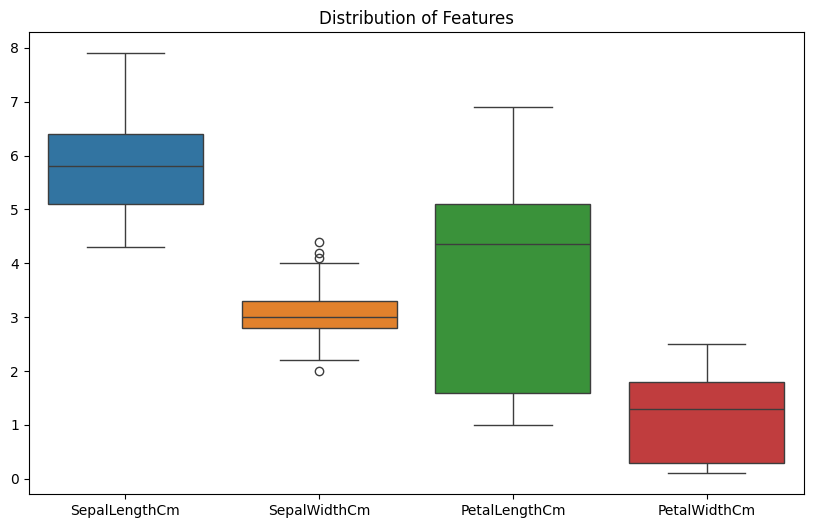

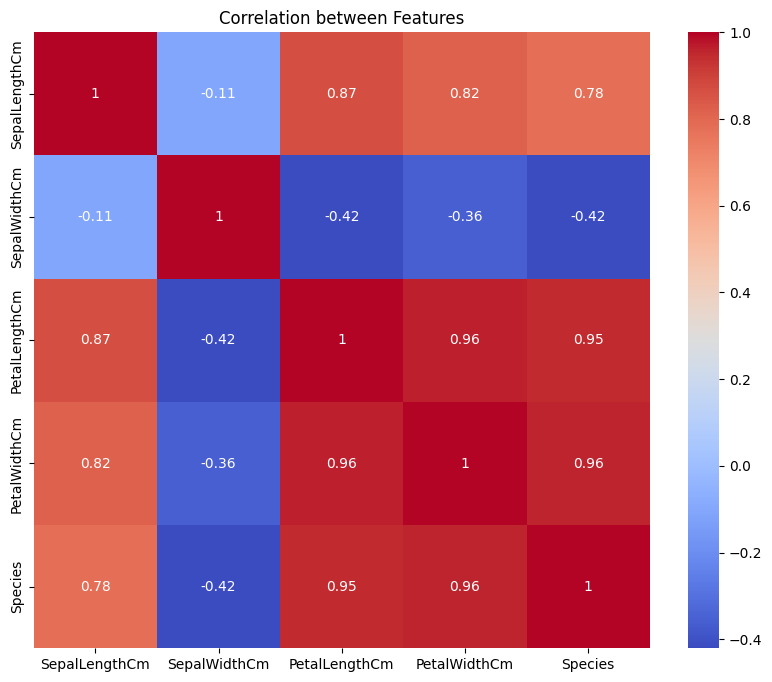

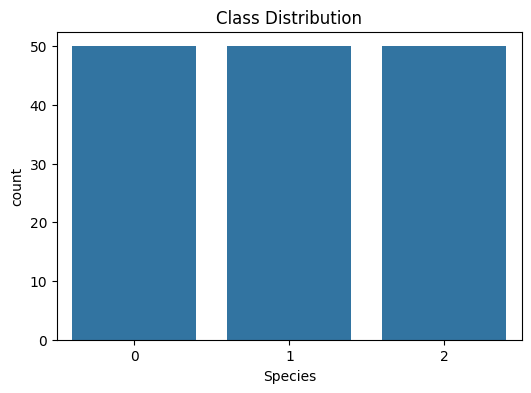

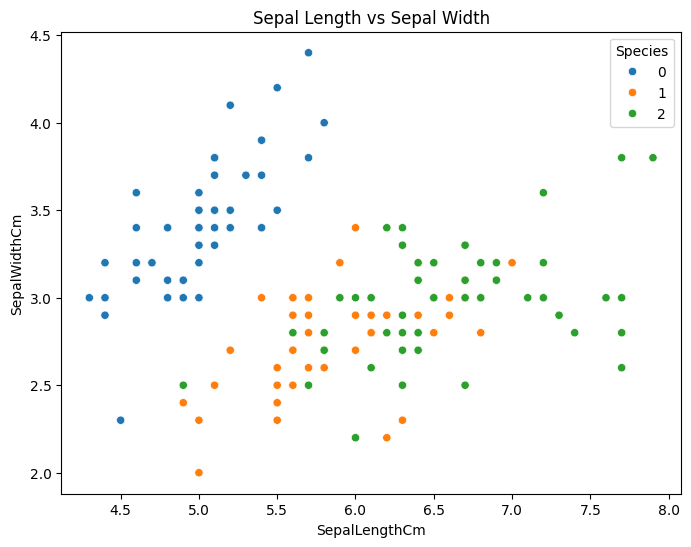

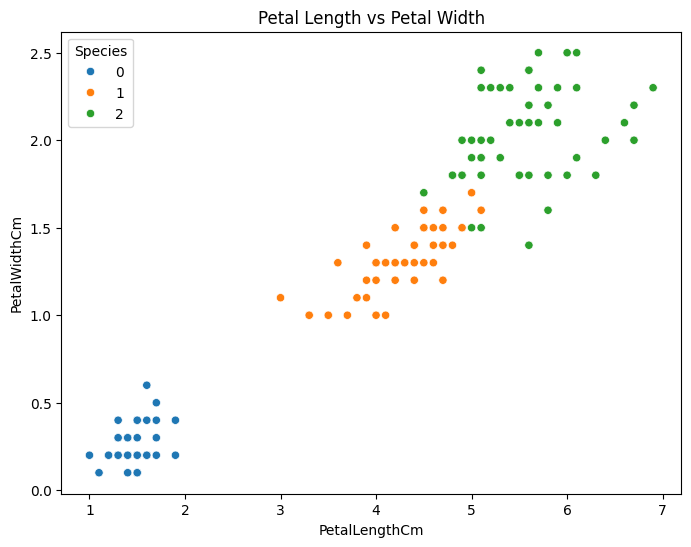

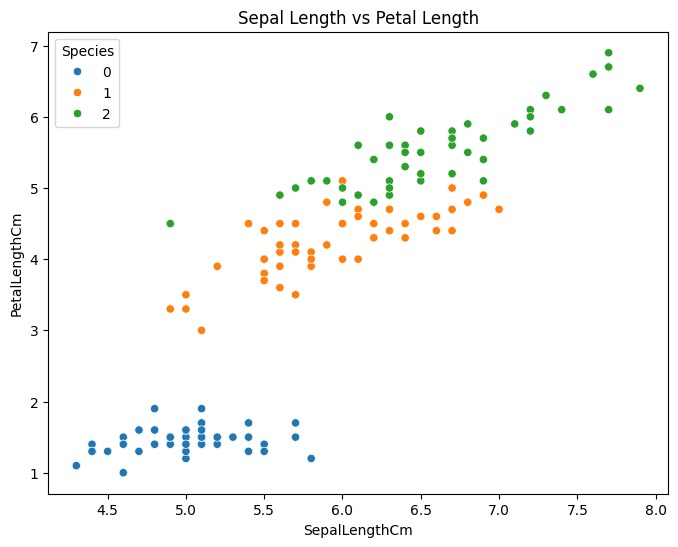

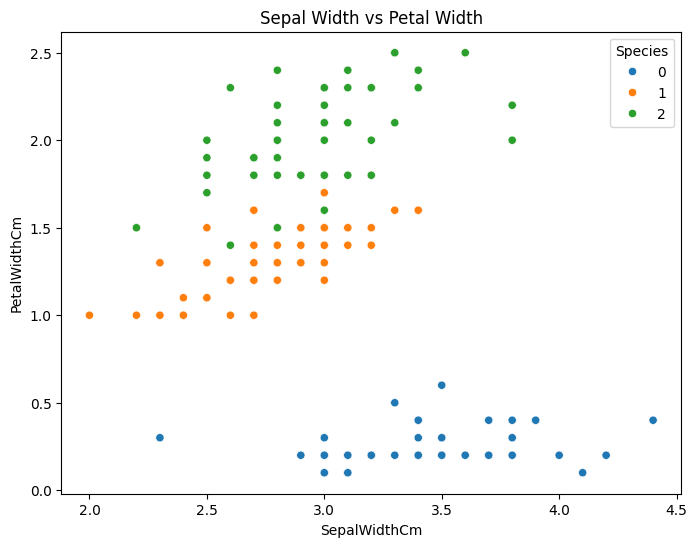

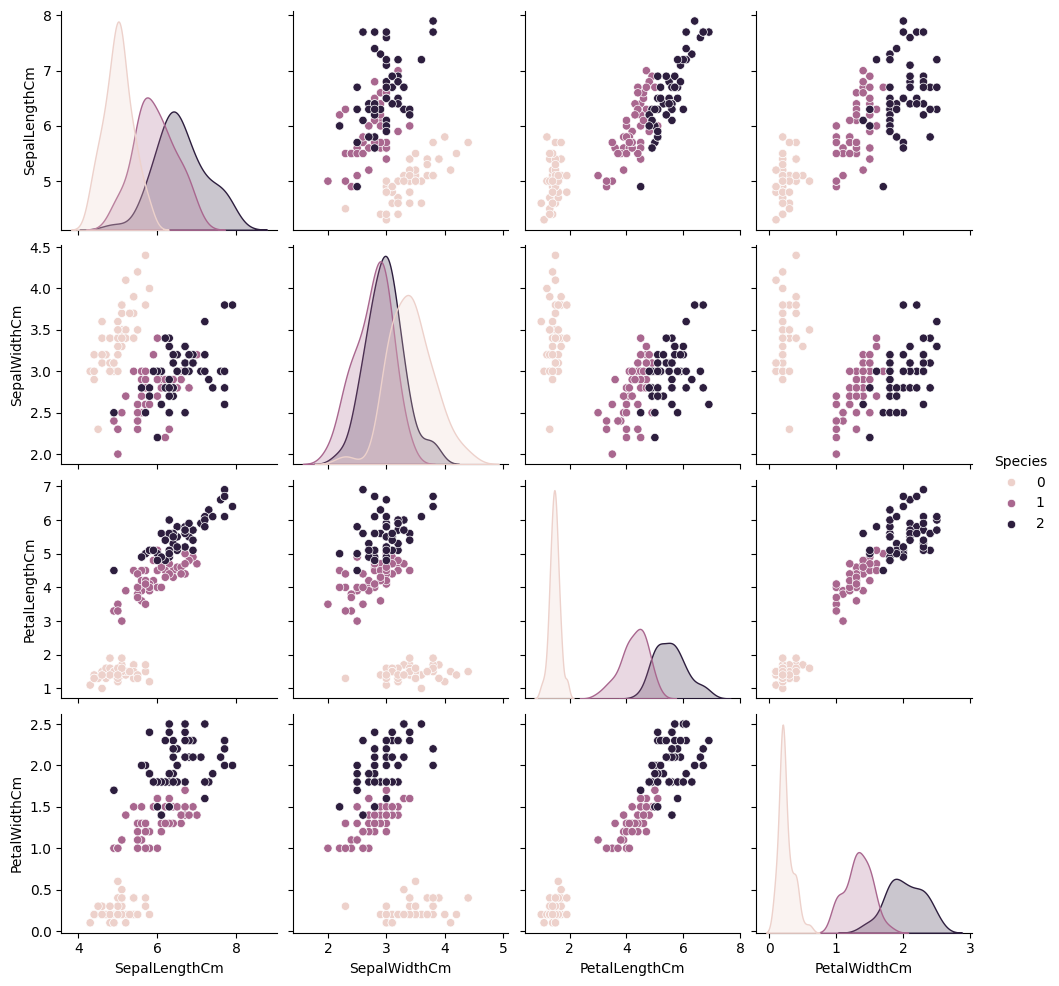

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int8   
dtypes: float64(4), int64(1), int8(1)
memory usage: 6.1 KB
None
               Id  SepalLengthCm  SepalWid

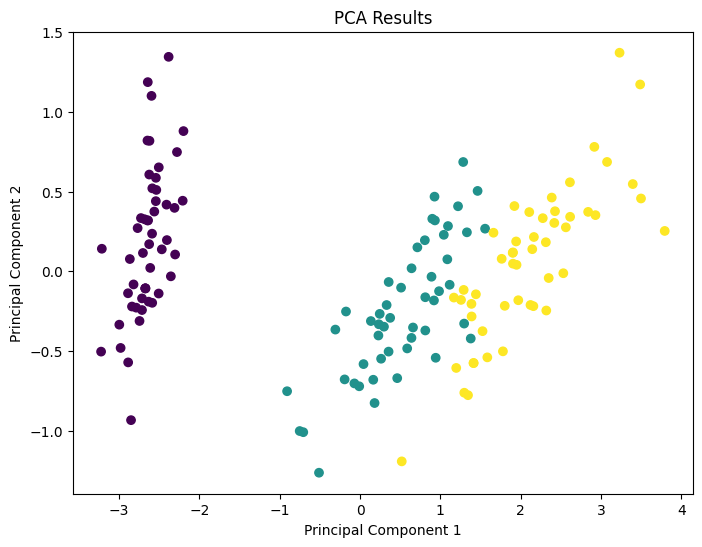

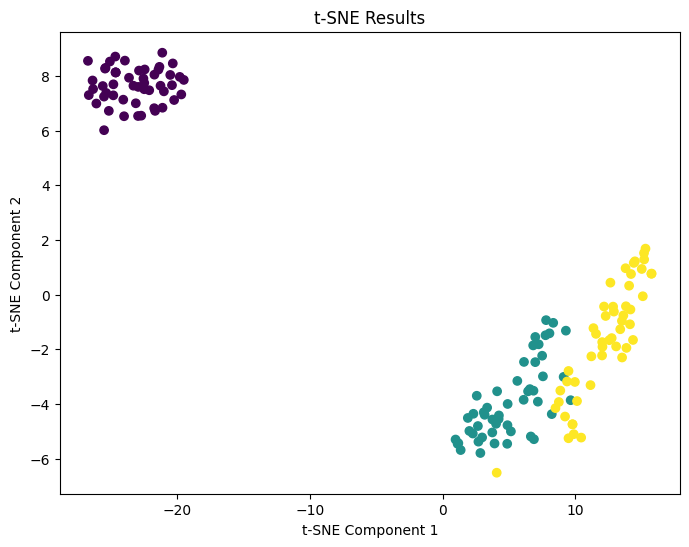

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score: 0.5525919445499757


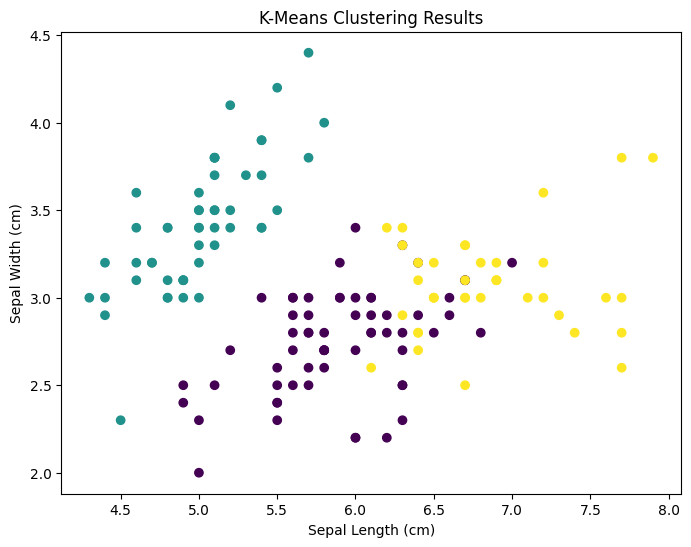

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris_df = pd.read_csv('/content/iris.csv')

# Rename columns to match the standard Iris dataset
iris_df.columns = ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

# Encode the species column to numerical values
iris_df['Species'] = iris_df['Species'].astype('category').cat.codes

# Visualize the distribution of each feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df.drop(['Id', 'Species'], axis=1))
plt.title('Distribution of Features')
plt.show()

# Visualize the correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(iris_df.drop('Id', axis=1).corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation between Features')
plt.show()

# Visualize the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Species', data=iris_df)
plt.title('Class Distribution')
plt.show()

# Visualize the relationship between sepal length and sepal width
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue=iris_df['Species'].astype('category'), data=iris_df)
plt.title('Sepal Length vs Sepal Width')
plt.show()

# Visualize the relationship between petal length and petal width
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue=iris_df['Species'].astype('category'), data=iris_df)
plt.title('Petal Length vs Petal Width')
plt.show()

# Visualize the relationship between sepal length and petal length
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', hue=iris_df['Species'].astype('category'), data=iris_df)
plt.title('Sepal Length vs Petal Length')
plt.show()

# Visualize the relationship between sepal width and petal width
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SepalWidthCm', y='PetalWidthCm', hue=iris_df['Species'].astype('category'), data=iris_df)
plt.title('Sepal Width vs Petal Width')
plt.show()

# Visualize the pairplot
sns.pairplot(iris_df.drop('Id', axis=1), hue='Species')
plt.show()

# Explore the dataset
print(iris_df.head())  # show the first few rows of the dataset
print(iris_df.info())  # show the dataset information
print(iris_df.describe())  # show the summary statistics of the dataset

# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_df.drop(['Id', 'Species'], axis=1))
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Visualize the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris_df['Species'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.show()

# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
iris_tsne = tsne.fit_transform(iris_df.drop(['Id', 'Species'], axis=1))

# Visualize the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(iris_tsne[:, 0], iris_tsne[:, 1], c=iris_df['Species'], cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Results')
plt.show()

# Perform clustering using K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(iris_df.drop(['Id', 'Species'], axis=1))
labels = kmeans.labels_

# Evaluate the clustering results using silhouette score
silhouette = silhouette_score(iris_df.drop(['Id', 'Species'], axis=1), labels)
print("Silhouette score:", silhouette)

# Visualize the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(iris_df['SepalLengthCm'], iris_df['SepalWidthCm'], c=labels, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering Results')
plt.show()